##### Amazon Books (sklearn)

In [177]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # model evaluation

In [178]:
df = pd.read_csv("amazon_books.csv")
df.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [179]:
df.shape

(325, 13)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         325 non-null    object 
 1   Author        324 non-null    object 
 2   List Price    324 non-null    float64
 3   Amazon Price  325 non-null    float64
 4   Hard/ Paper   325 non-null    object 
 5   NumPages      323 non-null    float64
 6   Publisher     324 non-null    object 
 7   Pub year      324 non-null    float64
 8   ISBN-10       325 non-null    object 
 9   Height        321 non-null    float64
 10  Width         320 non-null    float64
 11  Thick         324 non-null    float64
 12  Weight (oz)   316 non-null    float64
dtypes: float64(8), object(5)
memory usage: 33.1+ KB


In [181]:
df.isnull().sum()

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [182]:
df.dropna(inplace=True)

##### Explore 

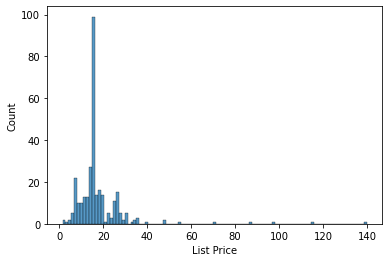

In [183]:
sns.histplot(df["List Price"]);

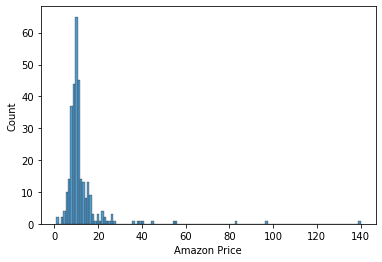

In [184]:
sns.histplot(df["Amazon Price"]);

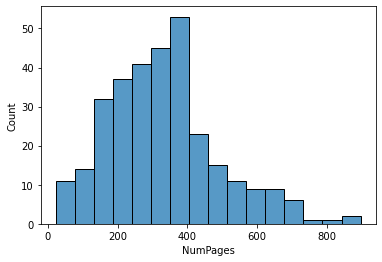

In [185]:
sns.histplot(df["NumPages"]);

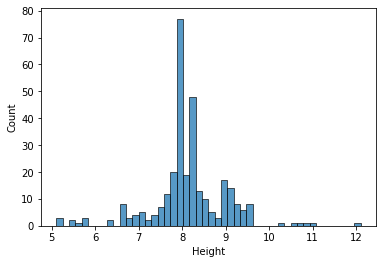

In [186]:
sns.histplot(df["Height"]);

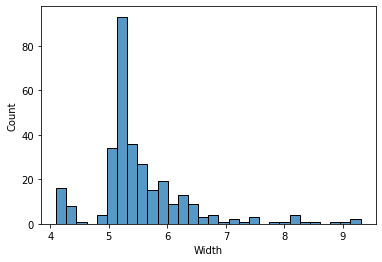

In [187]:
sns.histplot(df["Width"]);

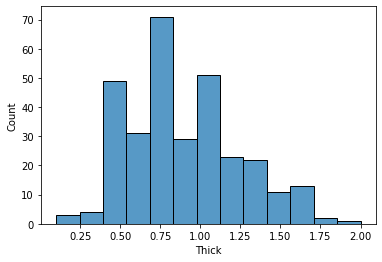

In [188]:
sns.histplot(df["Thick"]);

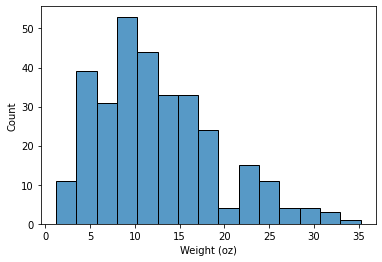

In [189]:
sns.histplot(df["Weight (oz)"]);

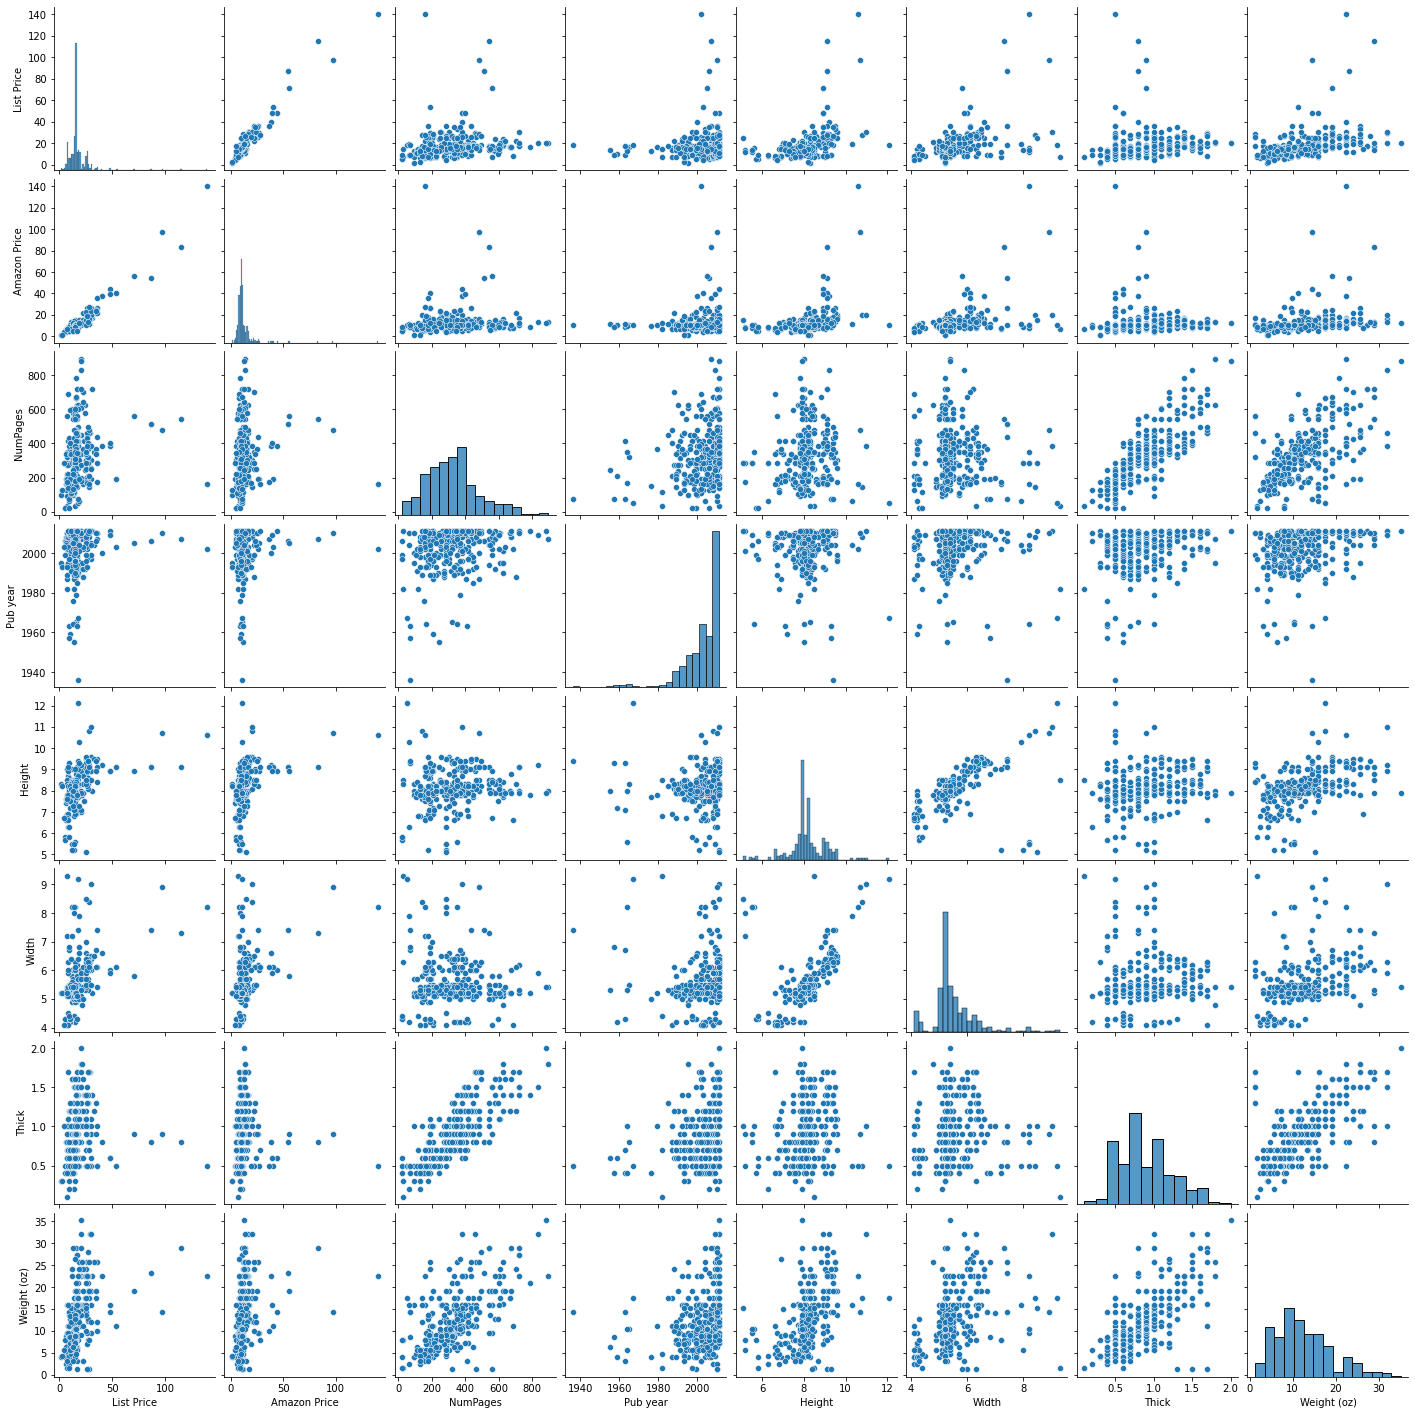

In [190]:
sns.pairplot(df)

##### Model

In [191]:
# We are going to predict the amazon price. set up X and y
df.columns

Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard/ Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight (oz)'],
      dtype='object')

In [192]:
predictors = ["List Price", "NumPages", "Height", "Width", "Thick", "Weight (oz)"]

X = df[predictors]
y = df["Amazon Price"]

In [193]:
# z score
z = StandardScaler()

z.fit(X)

Xz = z.transform(X)

In [194]:
# create model
LR_Model = LinearRegression()

In [195]:
# fit model
LR_Model.fit(Xz, y)

LinearRegression()

##### Model Evaluation

In [162]:
# predict
price_prediction = LR_Model.predict(Xz)
price_prediction[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [163]:
# mean squared error(mse) and mean absolute error(mae)
print(mean_squared_error(y, price_prediction)) # little harder to interpret.
print(mean_absolute_error(y,price_prediction))
# our model on average was about 2.16 dollars off.

10.612338601751459
2.160439748755668


In [164]:
# r2
r2_score(y, price_prediction)
# Our model explains about 92% of the variance in the data.

0.9205886088486431

### Assumption Checks

##### Make Data Frame

In [165]:
# make residual plot
assumption = pd.DataFrame({"error": y - price_prediction,
                          "predicted": price_prediction})

##### Normality of Residuals

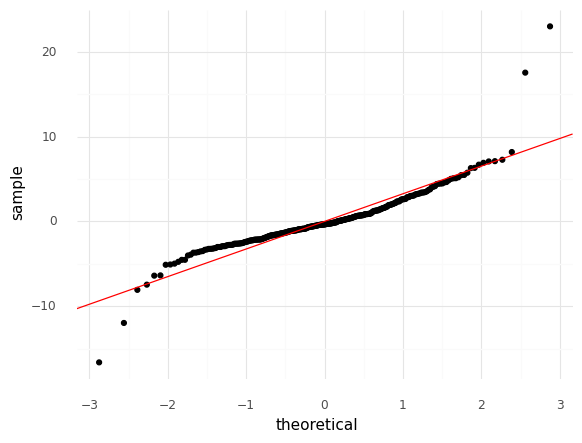

<ggplot: (104546493669)>

In [166]:
(ggplot(assumption, aes(sample="error")) + 
stat_qq() + theme_minimal() + geom_abline(intercept=0, slope=np.std(assumption["error"]), color="red"))

##### Homoskedasticity and Omnibus Linearity
**Homoskedasticity :** Errors are approximately distributed the same way across the model.

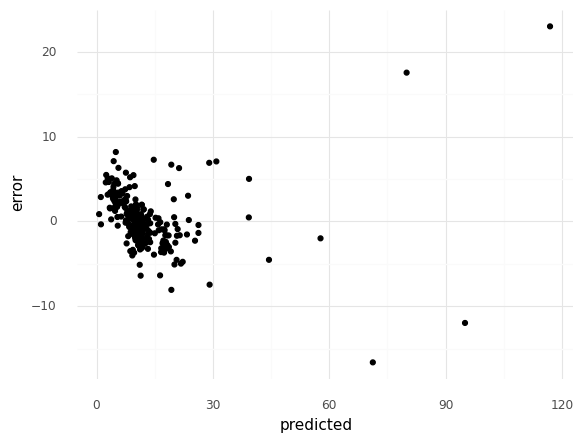

<ggplot: (104546484541)>

In [167]:
(ggplot(assumption, aes(x="predicted", y="error")) + geom_point() + theme_minimal())
# We actually have heteroskedasticity 
# that means that the spread of the errors as you move your eyes from left to right is not same.
# There is an area at least one in our graph where the errors are spread more widely than in another area of our graph.
# We would need to use a different type of model in order to account for this.

##### Linearity

In [168]:
predictors

['List Price', 'NumPages', 'Height', 'Width', 'Thick', 'Weight (oz)']

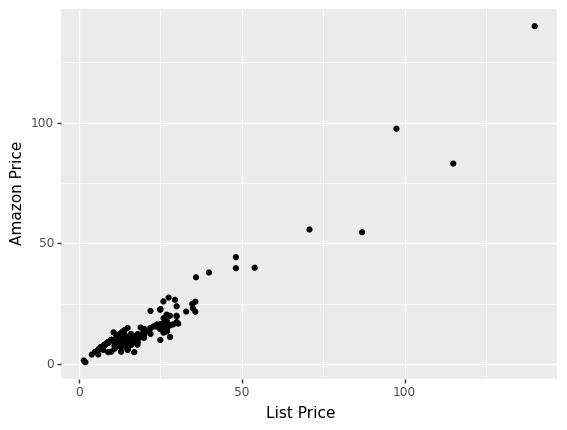

(<ggplot: (104547053047)>, <plotnine.themes.theme_minimal.theme_minimal object at 0x0000018577D31610>)


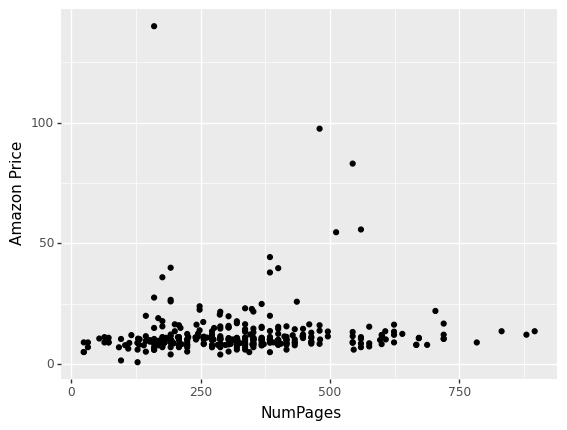

(<ggplot: (104546500627)>, <plotnine.themes.theme_minimal.theme_minimal object at 0x0000018577CFCB50>)


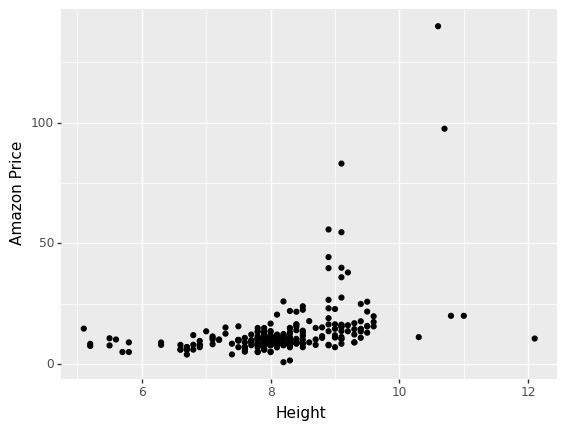

(<ggplot: (104547068176)>, <plotnine.themes.theme_minimal.theme_minimal object at 0x0000018577500130>)


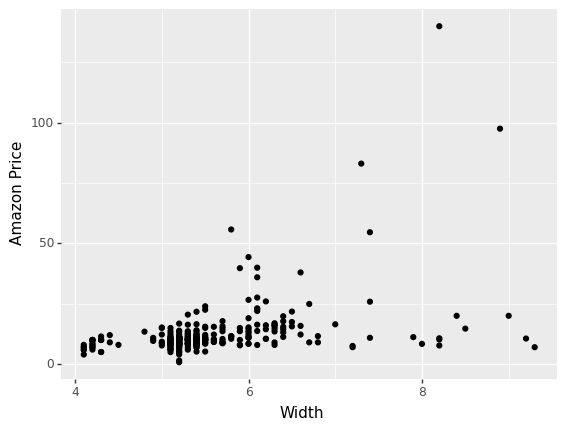

(<ggplot: (104547132823)>, <plotnine.themes.theme_minimal.theme_minimal object at 0x0000018577DA9100>)


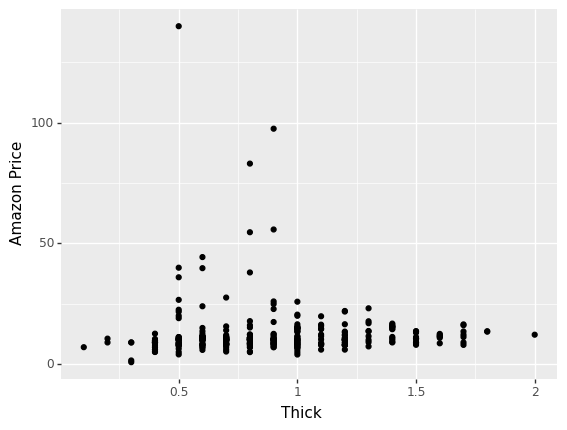

(<ggplot: (104547163221)>, <plotnine.themes.theme_minimal.theme_minimal object at 0x0000018577E9EAC0>)


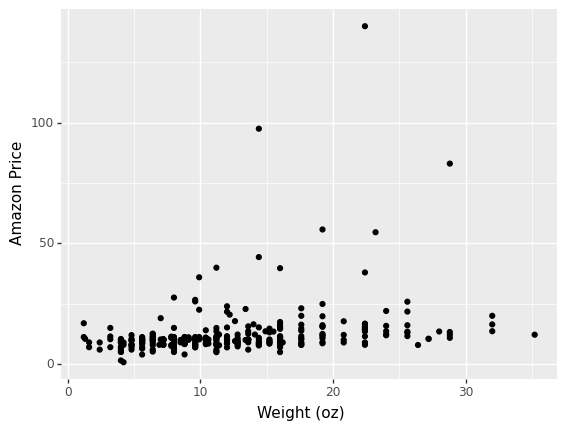

(<ggplot: (104547196883)>, <plotnine.themes.theme_minimal.theme_minimal object at 0x0000018577FD28B0>)


In [169]:
for feature in predictors:
    print((ggplot(df, aes(x= feature, y= "Amazon Price")) + geom_point(), theme_minimal()))
    

### Examples

##### Example- 1

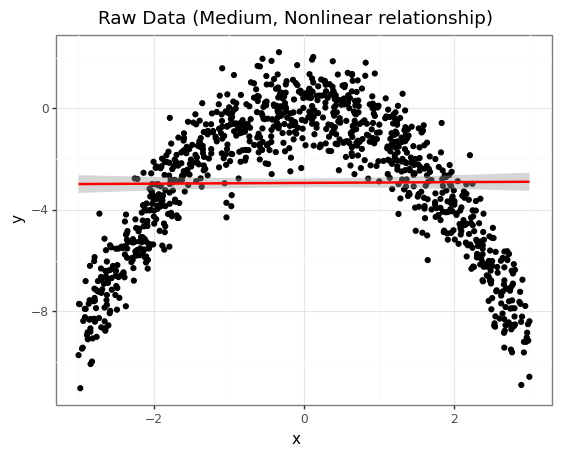

<ggplot: (104547157848)>

In [170]:
# medium relationship but NONlinear
x = np.random.uniform(low= -3, high= 3, size= 1000)
y = -1 * x**2 + np.random.normal(loc=0, scale=1, size=1000)

df = pd.DataFrame({"x":x, "y":y})

(ggplot(df, aes(x="x", y="y")) + geom_point() + theme_bw() + geom_smooth(method="lm", color="red") + 
labs(title= "Raw Data (Medium, Nonlinear relationship)"))

# This data very clearly violates linearity but we don't have evidence that it violates homoskedasticity.

##### Example- 2 

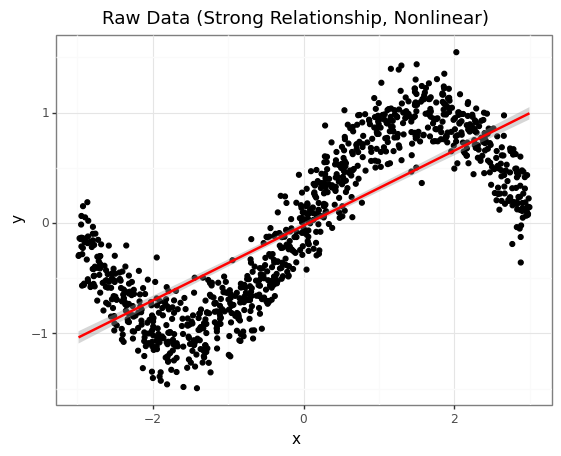

<ggplot: (104539294115)>

In [171]:
# Strong relationship but NONlinear
x = np.random.uniform(low = -3, high = 3, size = 1000)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.2, size = 1000)

df = pd.DataFrame({"x":x, "y":y})

(ggplot(df, aes(x="x", y="y")) + geom_point() + theme_bw() + geom_smooth(method = "lm", color = "red") + 
labs(title = "Raw Data (Strong Relationship, Nonlinear)"))

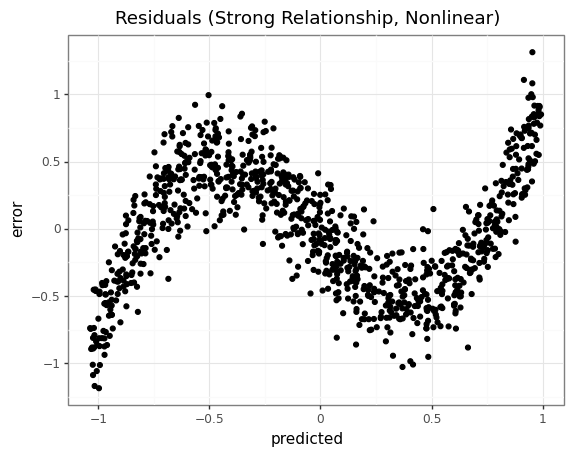

<ggplot: (104548387042)>

In [172]:
# What do you think the residuals will look like?

# create model
LR = LinearRegression()

# seperate predictors and outcome
X = np.array(df["x"]).reshape(-1, 1) # We have to do this because there is only 1 predictor.
y = df["y"]

# fit model
LR.fit(X,y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assumption = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assumption, aes(x="predicted", y="error")) + geom_point() + theme_bw() + labs(title= "Residuals (Strong Relationship, Nonlinear)")

##### Example- 3 

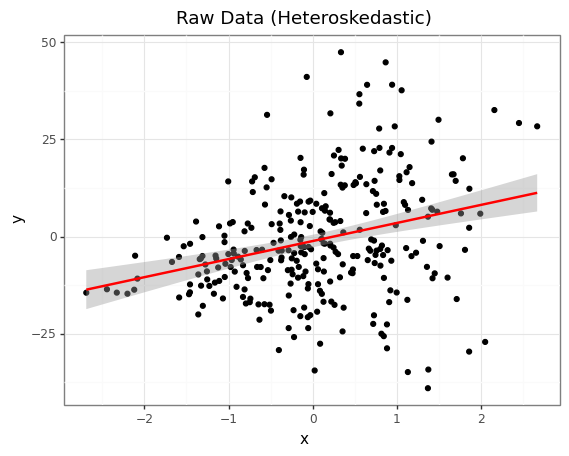

<ggplot: (104542790286)>

In [173]:
# Linear, Heteroskedastic Data
x = np.random.normal(loc = 0, scale = 1, size = 300)
y = x * 5.4 + (np.random.normal(loc = 0, scale = 0.1 + 5 * (x - min(x))))

df = pd.DataFrame({"x": x, "y": y})

(ggplot(df, aes(x = "x", y = "y")) + geom_point() + theme_bw() +
geom_smooth(method = "lm", color = "red") + labs(title = "Raw Data (Heteroskedastic)"))

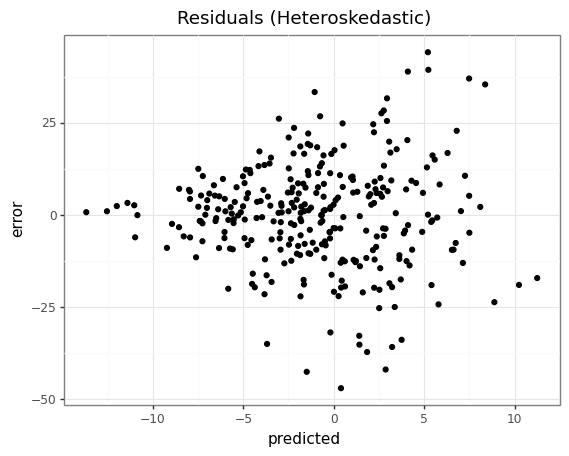

<ggplot: (104548458484)>

In [174]:
# What do you think the residuals will look like ?

# create model
LR = LinearRegression()

# seperate predictors and outcome
X = np.array(df["x"]).reshape(-1, 1) # We have to do this because there is only 1 predictor.
y = df["y"]

# fit model
LR.fit(X, y)

# grab fitted values
predicted = LR.predict(X)

# plot residual graph
assumption = pd.DataFrame({"error": predicted - y, "predicted": predicted})

ggplot(assumption, aes(x = "predicted", y = "error")) + geom_point() + theme_bw() + labs(title = "Residuals (Heteroskedastic)")

##### Pull Coefficients

In [175]:
# coef df
coefficients = pd.DataFrame({"Coef": LR_Model.coef_, "Name": predictors})
coefficients = coefficients.append({"Coef":LR_Model.intercept_, "Name": "intercept"}, ignore_index=True)

coefficients

# One standard deviaton increase in the list price is associated with an 11.4 dollar increase in the predicted amazon price.
# One standart deviaton increase in the weight is associated with an 0.41 dollar decrease in the predicted amazon price.

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.098886,Height
3,-0.197179,Width
4,-1.159632,Thick
5,-0.419686,Weight (oz)
6,12.587645,intercept


##### Predict

In [197]:
newBook = np.array([12.45, 300, 10, 0.8, 8, 5]).reshape(1, -1)
newBookz = z.transform(newBook)
LR_Model.predict(newBookz)

array([-14.02986847])

In [199]:
# Manual Check
newBook_inter = np.append(newBookz, 1)
newBook_inter

array([-0.41343253, -0.19260029,  2.15454896, -5.63182285, 20.03041224,
       -1.12341221,  1.        ])

In [203]:
np.sum(np.array(coefficients["Coef"]) * newBook_inter)

-14.029868470352536